In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aapl = pd.read_csv("Dataset/AAPL.csv",index_col=0)
amazon = pd.read_csv("Dataset/AMZN.csv")
fb = pd.read_csv("Dataset/FB.csv")
ge = pd.read_csv("Dataset/GE.csv")
google = pd.read_csv("Dataset/GOOGL.csv")
goldman_sachs = pd.read_csv("Dataset/GS.csv")
ibm = pd.read_csv("Dataset/IBM.csv")
jpmorgan = pd.read_csv("Dataset/JPM.csv")
microsoft = pd.read_csv("Dataset/MSFT.csv")
tesla = pd.read_csv("Dataset/TSLA.csv")

In [4]:
aapl.head()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [5]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3732 entries, 2005-10-17 to 2020-08-13
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              3732 non-null   float64
 1   High              3732 non-null   float64
 2   Low               3732 non-null   float64
 3   Close(t)          3732 non-null   float64
 4   Volume            3732 non-null   int64  
 5   SD20              3732 non-null   float64
 6   Upper_Band        3732 non-null   float64
 7   Lower_Band        3732 non-null   float64
 8   S_Close(t-1)      3732 non-null   float64
 9   S_Close(t-2)      3732 non-null   float64
 10  S_Close(t-3)      3732 non-null   float64
 11  S_Close(t-5)      3732 non-null   float64
 12  S_Open(t-1)       3732 non-null   float64
 13  MA5               3732 non-null   float64
 14  MA10              3732 non-null   float64
 15  MA20              3732 non-null   float64
 16  MA50              3732 non-null 

In [6]:
aapl.shape

(3732, 63)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

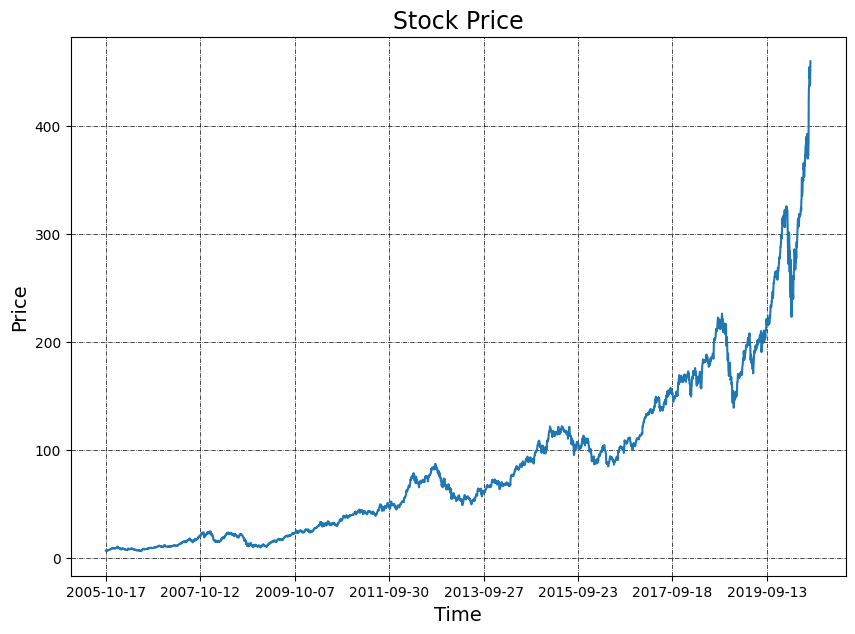

In [8]:
aapl['Close(t)'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [9]:
aapl = aapl.drop(columns='Date_col')

In [10]:
feature = aapl.drop(columns=['Close_forcast'],axis = 1)
target = aapl['Close_forcast']

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target,test_size=0.3,random_state=22)

In [12]:
xtest,xval,ytest,yval = train_test_split(xtest,ytest,test_size=0.33,random_state=22)

In [13]:
xtrain.shape

(2612, 61)

In [14]:
xtest.shape

(750, 61)

In [15]:
xval.shape

(370, 61)

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [18]:
lr.score(xtrain,ytrain)

0.9991263664566321

In [19]:
ytrainpred = lr.predict(xtrain)
ytestpred = lr.predict(xtest)
yvalpred = lr.predict(xval)

In [20]:
metrics.mean_squared_error(ytrain,ytrainpred)

5.345267413830643

In [21]:
metrics.mean_squared_error(ytest,ytestpred)

6.9375874203125445

In [22]:
metrics.mean_squared_error(yval,yvalpred)

6.386853831099845

In [29]:
aapl_pred = pd.DataFrame(yval.values, columns=['Actual'], index=yval.index)
aapl_pred['Predicted'] = yvalpred
aapl_pred = aapl_pred.reset_index()
aapl_pred.loc[:, 'Date'] = pd.to_datetime(aapl_pred['Date'],format='%Y-%m-%d')
aapl_pred.sort_values(by='Date',ascending=True)


,Date,Actual,Predicted
94,2005-10-17,6.45,6.803362
149,2005-11-02,7.64,7.766137
24,2005-11-17,7.97,8.418629
147,2005-12-01,8.97,9.182570
281,2005-12-08,9.18,9.446490
...,...,...,...
59,2020-04-20,267.16,278.289342
285,2020-06-04,330.90,323.816040
122,2020-06-09,352.20,342.817459
43,2020-06-18,349.09,353.552790


<AxesSubplot:>

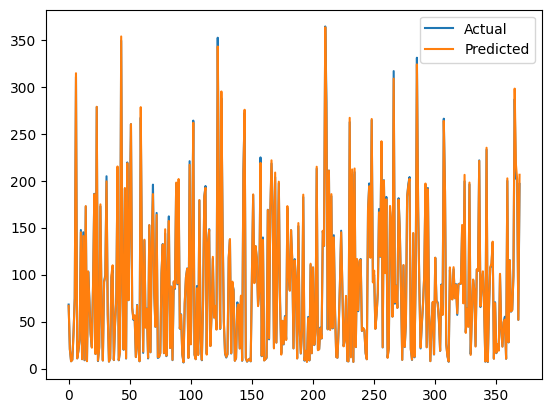

In [31]:
aapl_pred[['Actual', 'Predicted']].plot()

In [32]:
import pickle
# open a file, where you want to store the data
file = open('linear_regression.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)